# Book Babies
## DataPrep and Exploratory Data Analysis
EEK, 2024-10-27

Exploring GoodReads dataset from BrightData


## Setup

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import numpy as np 
import tensorflow_recommenders as tfrs
import tensorflow as tf
import csv
from tqdm import tqdm

from typing import Dict, Text
import re
import json

2024-10-27 11:05:19.080545: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Import the GoodReads dataset from BrightData 
https://huggingface.co/datasets/BrightData/Goodreads-Books

In [2]:
%%time

df = pd.read_csv("hf://datasets/BrightData/Goodreads-Books/Goodreads-Books.csv")

In [13]:
df.head()

,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,about_author,community_reviews,kindle_price
0,https://www.goodreads.com/book/show/1047836.Ho...,1047836.Horror_Film_Directors_1931_1990,"Horror Film Directors, 1931-1990","[""Dennis Fischer""]",4.29,7.0,NaN,An exhaustive study of the major directors of ...,NaN,11/1/1991,"{""name"":""Dennis Fischer"",""num_books"":14}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
1,https://www.goodreads.com/book/show/4089333-au...,4089333-australian-urban-planning,"Australian Urban Planning: New Challenges, New...","[""Brendan Gleeson""]",3.00,1.0,NaN,"Designed for use by academics, students, plann...",NaN,2/1/2000,"{""name"":""Brendan Gleeson"",""num_books"":28}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
2,https://www.goodreads.com/book/show/26764878-m...,26764878-morgen-ohne-gestern,Morgen ohne gestern: Roman,"[""Regina Nössler""]",3.00,2.0,NaN,Christine Hoffmann wacht eines Morgens im Kran...,NaN,9/18/2015,"{""name"":""Regina Nössler"",""num_books"":28,""num_f...","{""1_stars"":{""reviews_num"":1,""reviews_percentag...","""$10.89"""
3,https://www.goodreads.com/book/show/23656944-z...,23656944-zen-and-the-art-of-recording,Zen and the Art of Recording,"[""Mixerman""]",4.19,88.0,4.0,"In this book, the third in the Zen and the Art...","[""Music"",""Nonfiction""]",10/1/2014,"{""name"":""Mixerman"",""num_books"":15,""num_followe...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$24.09"""
4,https://www.goodreads.com/book/show/26761586-t...,26761586-the-big-book-of-codewords,The Big Book Of Codewords,"[""Parragon Books""]",4.50,6.0,NaN,500 codeword puzzles in one great book!,NaN,9/5/2015,"{""name"":""Parragon Books"",""num_books"":6068,""num...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN


### First Impressions:
* There is no field for the language although there are certainly many different languages represented here.
* In some cases the "author" is not a person but a publishing house (see df.index==4, "Parragon Books")
* I do wish we had more information on the categories (such as those available in WorldCat)

In [31]:
np.sum(df.isna(), axis=0)

url                        0
id                         0
name                      11
author                    60
star_rating               30
num_ratings               30
num_reviews          3228286
summary               675987
genres               4652171
first_published       232242
about_author               0
community_reviews          0
kindle_price         4137784
dtype: int64

In [69]:
df.shape

(6389859, 13)

In [73]:
# na calc
np.sum(df.isna(), axis=0)/df.shape[0]*100

url                   0.000000
id                    0.000000
name                  0.000172
author                0.000939
star_rating           0.000469
num_ratings           0.000469
num_reviews          50.522022
summary              10.579060
genres               72.805535
first_published       3.634540
about_author          0.000000
community_reviews     0.000000
kindle_price         64.755482
dtype: float64

### NA assessment:
* The dataset is not so complete - particularly in genres which are missing in 72% of the entries
* The kindle price is also nearly 65% missing but that is less imperative for this analysis
* How many of the missing genres overlap with the missing num_reviews?  


In [74]:
d_test = df.dropna(subset=['genres'])

np.sum(d_test.isna(), axis=0)/d_test.shape[0]*100

url                   0.000000
id                    0.000000
name                  0.000173
author                0.000806
star_rating           0.000345
num_ratings           0.000345
num_reviews          13.481879
summary               3.855698
genres                0.000000
first_published       1.301672
about_author          0.000000
community_reviews     0.000000
kindle_price         50.943437
dtype: float64

* It's not a perfect overlap, but roughly 3/4 of the missing reviews overlapped with missing genres.

In [75]:

print(f"length of raw dataframe: {df.shape[0]} \nlength of df after na removed: {df.drop(columns='kindle_price').dropna().shape[0]}")

length of raw dataframe: 6389859 
length of df after na removed: 1450895


In [76]:
df = df.drop(columns='kindle_price').dropna()

## For now we're dropping the NAs

But on the to-do list we'll try to see if there's a dataset that includes genres that we can include.



In [ ]:
### Date Published assessment 




In [35]:
print(type(df.first_published[0]), df.first_published[0])

<class 'str'> 11/1/1991


In [52]:
df.first_published[0][-4:]

'1991'

In [60]:
# df['first_published_dt']
A = [a[-4:] for a in df.first_published.dropna()]


In [56]:
set([type(a) for a in df.first_published])

{float, str}

In [59]:
df[type(a) == float for a in df.first_published]

SyntaxError: invalid syntax (246069094.py, line 1)

In [29]:
df.iloc[df.index[df.first_published.isna()]] #[df.first_published=='1/1/1373']]

,url,id,name,author,star_rating,num_ratings,num_reviews,summary,genres,first_published,about_author,community_reviews,kindle_price
45,https://www.goodreads.com/book/show/18217963,18217963,دنیای ربات ها,"[""Isaac Asimov""]",3.75,8.0,NaN,NaN,NaN,NaN,"{""name"":""Isaac Asimov"",""num_books"":4451,""num_f...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
53,https://www.goodreads.com/book/show/13626249-w...,13626249-winter-s-withering,Winter's Withering,"[""Craig MacLachlan""]",5.00,1.0,NaN,NaN,NaN,NaN,"{""name"":""Craig MacLachlan"",""num_books"":4,""num...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
59,https://www.goodreads.com/book/show/46264223-s...,46264223-spell-tricked,Spell Tricked,"[""Eliza Grace""]",3.75,4.0,1.0,"Once, her mother’s rules kept Matilda safe.\r\...",NaN,NaN,"{""name"":""Eliza Grace"",""num_books"":5,""num_fo...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...","""$3.99"""
61,https://www.goodreads.com/book/show/26815537-h...,26815537-heart-disease,Heart Disease: Chicken Soup For The Soul Livin,"[""Rackner Vicki""]",4.00,1.0,NaN,Endorsed and supported by the Hope Heart Insti...,NaN,NaN,"{""name"":""Rackner Vicki"",""num_books"":1}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
83,https://www.goodreads.com/book/show/18196686-a...,18196686-atak-rozpaczy,Atak rozpaczy,"[""Artur Hajzer""]",3.80,64.0,3.0,"""Atak rozpaczy"" to książka, która opisuje barw...",NaN,NaN,"{""name"":""Artur Hajzer"",""num_books"":4}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389634,https://www.goodreads.com/book/show/37586366-c...,37586366-civil-war-ii,Civil War II: The Fallen #1,"[""Greg Pak""]",4.08,61.0,9.0,"As a giant falls, friends and enemies alike ga...","[""Comics"",""Marvel""]",NaN,"{""name"":""Greg Pak"",""num_books"":1566,""num_follo...","{""1_stars"":{""reviews_num"":1,""reviews_percentag...","""$1.99"""
6389690,https://www.goodreads.com/book/show/33236569-m...,33236569-magic-animal-friends-series-1-and-2--...,Magic Animal Friends Series 1 and 2 - 8 Books ...,"[""Daisy Meadows""]",4.94,16.0,NaN,Magic Animal Friends Collection 8 Books Boxed ...,NaN,NaN,"{""name"":""Daisy Meadows"",""num_books"":858,""num_f...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
6389738,https://www.goodreads.com/book/show/7116387-aiel,7116387-aiel,"Aiel: Aviendha, Minor Wheel Of Time Characters...","[""Frederic P. Miller""]",5.00,2.0,NaN,NaN,NaN,NaN,"{""name"":""Frederic P. Miller"",""num_books"":2445...","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN
6389743,https://www.goodreads.com/book/show/13425265-r...,13425265-romance-of-blood,Romance of Blood,"[""Jill Freeman""]",3.00,1.0,1.0,Amelia is an assassin on the run. She often wi...,NaN,NaN,"{""name"":""Jill Freeman"",""num_books"":4}","{""1_stars"":{""reviews_num"":0,""reviews_percentag...",NaN


In [33]:
df_bookdepot = pd.read_csv('data/book_depository_dataset/dataset.csv')
df_bookdepot.head()

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,NaN,NaN,NaN,...,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,NaN,NaN,NaN,...,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,New edition,NaN,NaN,...,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,NaN,Export - Airside ed,NaN,...,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,NaN,NaN,NaN,...,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00


In [34]:
df_bookdepot.describe(include='all')

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
count,1109383,6.425410e+05,1109383,1029296,1.061156e+06,1.015852e+06,1.061156e+06,182814,360346,75993,...,1109383,1.109383e+06,1048976,1106780,0.0,669253.000000,6.692530e+05,1109383,1109383,1.022210e+06
unique,564646,NaN,425186,841392,NaN,NaN,NaN,104,11292,55,...,1109382,NaN,162,14976,NaN,NaN,NaN,957559,1109383,NaN
top,[],NaN,[2964],This book is a facsimile reprint and may conta...,NaN,NaN,NaN,Unabridged,Unabridged,12-17,...,1572507063,NaN,en,2010-09-10 00:00:00,NaN,NaN,NaN,Journal Your Life's Journey : Journals To Writ...,/Soldier-Five-Mike-Coburn/9781840189070,NaN
freq,17495,NaN,4944,16770,NaN,NaN,NaN,82505,55697,39267,...,2,NaN,986575,12335,NaN,NaN,NaN,208,1,NaN
mean,NaN,9.209777e+05,NaN,NaN,1.607659e+02,2.249102e+02,2.644117e+01,NaN,NaN,NaN,...,NaN,9.781658e+12,NaN,NaN,NaN,3.974918,1.239215e+04,NaN,NaN,4.616623e+02
std,NaN,8.642210e+05,NaN,NaN,3.802671e+01,4.347322e+01,4.779869e+01,NaN,NaN,NaN,...,NaN,1.747523e+09,NaN,NaN,NaN,0.543605,1.333263e+05,NaN,NaN,6.587618e+02
min,NaN,1.001000e+03,NaN,NaN,2.500000e-01,1.000000e+00,1.000000e-01,NaN,NaN,NaN,...,NaN,9.780000e+12,NaN,NaN,NaN,1.000000,1.000000e+00,NaN,NaN,1.500000e+01
25%,NaN,1.654890e+05,NaN,NaN,1.380000e+02,2.030000e+02,9.000000e+00,NaN,NaN,NaN,...,NaN,9.780801e+12,NaN,NaN,NaN,3.730000,5.000000e+00,NaN,NaN,1.814400e+02
50%,NaN,6.646830e+05,NaN,NaN,1.520000e+02,2.290000e+02,1.575000e+01,NaN,NaN,NaN,...,NaN,9.781474e+12,NaN,NaN,NaN,4.000000,3.900000e+01,NaN,NaN,3.180000e+02
75%,NaN,1.455812e+06,NaN,NaN,1.780000e+02,2.420000e+02,2.500000e+01,NaN,NaN,NaN,...,NaN,9.781743e+12,NaN,NaN,NaN,4.260000,5.200000e+02,NaN,NaN,5.352400e+02


In [35]:
df_combo1 = df_booksum.merge(df_books, how='left', left_on=['BookTitle', 'Author'], right_on=['Book-Title', 'Book-Author'])

In [36]:
df_combo1.describe(include='all')

,Index,ID,BookTitle,Author,Genre,Summary,genre_list,Summary_length,Book-Title,Book-Author,year_published,avg_rating,std_rating,num_ratings
count,16559.000000,16559,16559,16559,16559,16559,16559,16559.000000,3196,3196,3196.000000,3196.000000,2183.000000,3196.000000
unique,NaN,16559,16277,4715,2155,16532,2155,NaN,3181,1340,NaN,NaN,NaN,NaN
top,NaN,620,Nemesis,,,~Plot outline description~ --> <!--,[],NaN,Peter Pan,Agatha Christie,NaN,NaN,NaN,NaN
freq,NaN,1,6,2382,3718,13,3718,NaN,2,47,NaN,NaN,NaN,NaN
mean,8280.000000,NaN,NaN,NaN,NaN,NaN,NaN,2511.108944,NaN,NaN,1990.550688,7.716118,1.488259,13.099812
std,4780.315889,NaN,NaN,NaN,NaN,NaN,NaN,2903.074330,NaN,NaN,10.779607,1.235548,0.728360,30.506928
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,1910.000000,1.000000,0.000000,1.000000
25%,4140.500000,NaN,NaN,NaN,NaN,NaN,NaN,710.000000,NaN,NaN,1984.000000,7.000000,1.023557,1.000000
50%,8280.000000,NaN,NaN,NaN,NaN,NaN,NaN,1550.000000,NaN,NaN,1993.000000,7.887112,1.460258,3.000000
75%,12419.500000,NaN,NaN,NaN,NaN,NaN,NaN,3325.000000,NaN,NaN,1999.000000,8.500000,1.861853,10.000000


In [37]:
df_combo2 = df_booksum.merge(df_books, how='inner', left_on=['BookTitle', 'Author'], right_on=['Book-Title', 'Book-Author']).drop(['Book-Title', 'Book-Author', 'Genre', 'ID', 'Index'], axis=1)

In [38]:
df_combo2.describe(include='all')

,BookTitle,Author,Summary,genre_list,Summary_length,year_published,avg_rating,std_rating,num_ratings
count,3196,3196,3196,3196,3196.000000,3196.000000,3196.000000,2183.000000,3196.000000
unique,3181,1340,3196,863,NaN,NaN,NaN,NaN,NaN
top,Peter Pan,Agatha Christie,"Old Major, the old boar on the Manor Farm, ca...",[],NaN,NaN,NaN,NaN,NaN
freq,2,47,1,244,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2972.673655,1990.550688,7.716118,1.488259,13.099812
std,NaN,NaN,NaN,NaN,2920.251256,10.779607,1.235548,0.728360,30.506928
min,NaN,NaN,NaN,NaN,35.000000,1910.000000,1.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,976.750000,1984.000000,7.000000,1.023557,1.000000
50%,NaN,NaN,NaN,NaN,2109.000000,1993.000000,7.887112,1.460258,3.000000
75%,NaN,NaN,NaN,NaN,4047.000000,1999.000000,8.500000,1.861853,10.000000


* CMU has 16.5k books - the inner join with the 247k books in the df_books dataset leaves us with only 3200.
* I'll move forward for now but would like to consider if there are other sources with a more complete dataset.

In [39]:
df_combo2.head()

,BookTitle,Author,Summary,genre_list,Summary_length,year_published,avg_rating,std_rating,num_ratings
0,Animal Farm,George Orwell,"Old Major, the old boar on the Manor Farm, ca...","[Roman à clef, Satire, Children's literature, ...",5812,1956.0,8.281910,1.721726,120.0
1,The Plague,Albert Camus,The text of The Plague is divided into five p...,"[Existentialism, Fiction, Absurdist fiction, N...",6642,1972.0,8.111111,1.166667,9.0
2,All Quiet on the Western Front,Erich Maria Remarque,"The book tells the story of Paul Bäumer, a Ge...","[War novel, Roman à clef]",4283,1990.0,8.531250,1.413857,32.0
3,Crash,J. G. Ballard,The story is told through the eyes of narrato...,"[Speculative fiction, Fiction, Novel]",659,1996.0,6.000000,NaN,1.0
4,Children of Dune,Frank Herbert,Nine years after Emperor Paul Muad'dib walked...,"[Science Fiction, Speculative fiction, Childre...",3826,1977.0,8.875000,2.121320,5.0


In [40]:
# Join in the author data 

df = df_combo2.merge(df_authors, how='left', left_on='Author', right_on='Author')
df = df.merge(df_author, how='left', left_on='Author', right_on='Author')
df.head()

,BookTitle,Author,Summary,genre_list,Summary_length,year_published,avg_rating,std_rating,num_ratings,avg_rating_author,num_ratings_author,num_works
0,Animal Farm,George Orwell,"Old Major, the old boar on the Manor Farm, ca...","[Roman à clef, Satire, Children's literature, ...",5812,1956.0,8.281910,1.721726,120.0,8.565043,344.0,8
1,The Plague,Albert Camus,The text of The Plague is divided into five p...,"[Existentialism, Fiction, Absurdist fiction, N...",6642,1972.0,8.111111,1.166667,9.0,8.039720,107.0,7
2,All Quiet on the Western Front,Erich Maria Remarque,"The book tells the story of Paul Bäumer, a Ge...","[War novel, Roman à clef]",4283,1990.0,8.531250,1.413857,32.0,8.391304,46.0,4
3,Crash,J. G. Ballard,The story is told through the eyes of narrato...,"[Speculative fiction, Fiction, Novel]",659,1996.0,6.000000,NaN,1.0,7.431818,11.0,17
4,Children of Dune,Frank Herbert,Nine years after Emperor Paul Muad'dib walked...,"[Science Fiction, Speculative fiction, Childre...",3826,1977.0,8.875000,2.121320,5.0,8.208907,353.0,20


The publication dates are not reliable - just spot checking, A Clockwork Orange isn't correct - it was published in 1962 not 1994.

Does the bookdepot dataset do any better?

In [41]:
min(df_bookdepot[df_bookdepot.title=='A Clockwork Orange']['publication-date'])

'2008-09-01 00:00:00'

In [42]:
# df_bookdepot[df_bookdepot.title=='A Clockwork Orange']

<span style='color:blue;font-weight:900'>Nope!</span>

In [43]:
genre_dict = {}
for a in df.genre_list:
    for i in a:
        if i in genre_dict.keys():
            genre_dict[i] += 1
        else:
            genre_dict[i] = 1

In [44]:
df_genre_summary = pd.DataFrame.from_dict(genre_dict, orient='index').reset_index()
df_genre_summary.columns = ['genre', 'count_in_genre']
df_genre_summary.sort_values(by='count_in_genre', ascending=False).head(10)

,genre,count_in_genre
4,Fiction,1761
3,Speculative fiction,1225
7,Novel,772
9,Science Fiction,646
2,Children's literature,603
14,Fantasy,533
12,Mystery,391
23,Suspense,311
57,Crime Fiction,237
40,Thriller,181


<Axes: xlabel='count_in_genre', ylabel='genre'>

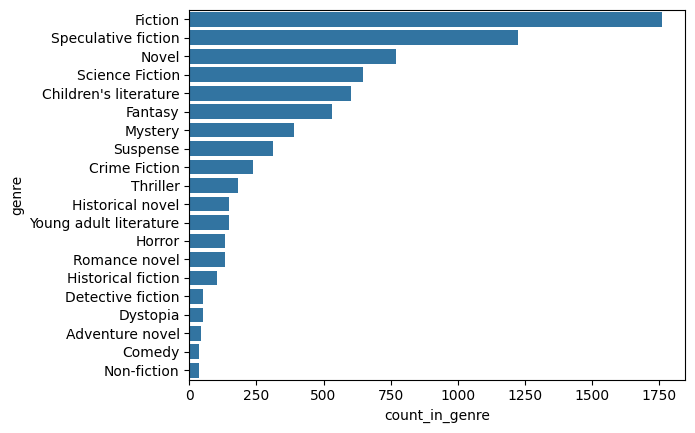

In [45]:
sns.barplot(data=df_genre_summary.sort_values(by='count_in_genre', ascending=False).head(20), y='genre', x='count_in_genre')

In [46]:
print(f'There are {len(df_genre_summary)} different genres represented in this dataset')

There are 155 different genres represented in this dataset


In [53]:
df_genre_summary = df_genre_summary.sort_values(by='count_in_genre', ascending=False).reset_index(drop=True)
df_genre_summary.head()

,index,genre,count_in_genre
0,4,Fiction,1761
1,3,Speculative fiction,1225
2,7,Novel,772
3,9,Science Fiction,646
4,2,Children's literature,603


In [47]:
df_genre_summary.describe()

,count_in_genre
count,155.000000
mean,54.174194
std,201.592399
min,1.000000
25%,1.500000
50%,4.000000
75%,13.000000
max,1761.000000


In [48]:
df.head()

,BookTitle,Author,Summary,genre_list,Summary_length,year_published,avg_rating,std_rating,num_ratings,avg_rating_author,num_ratings_author,num_works
0,Animal Farm,George Orwell,"Old Major, the old boar on the Manor Farm, ca...","[Roman à clef, Satire, Children's literature, ...",5812,1956.0,8.281910,1.721726,120.0,8.565043,344.0,8
1,The Plague,Albert Camus,The text of The Plague is divided into five p...,"[Existentialism, Fiction, Absurdist fiction, N...",6642,1972.0,8.111111,1.166667,9.0,8.039720,107.0,7
2,All Quiet on the Western Front,Erich Maria Remarque,"The book tells the story of Paul Bäumer, a Ge...","[War novel, Roman à clef]",4283,1990.0,8.531250,1.413857,32.0,8.391304,46.0,4
3,Crash,J. G. Ballard,The story is told through the eyes of narrato...,"[Speculative fiction, Fiction, Novel]",659,1996.0,6.000000,NaN,1.0,7.431818,11.0,17
4,Children of Dune,Frank Herbert,Nine years after Emperor Paul Muad'dib walked...,"[Science Fiction, Speculative fiction, Childre...",3826,1977.0,8.875000,2.121320,5.0,8.208907,353.0,20


<Axes: xlabel='std_rating', ylabel='Count'>

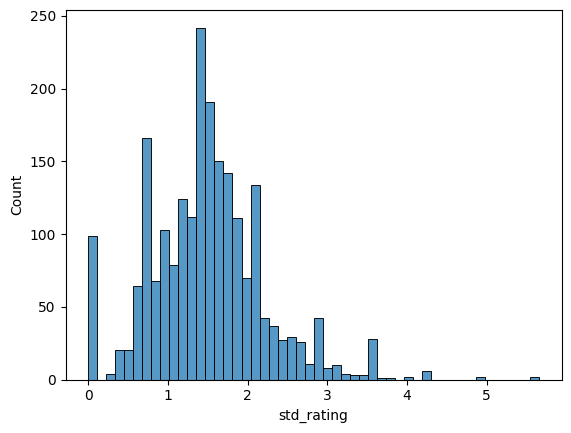

In [49]:
sns.histplot(data=df, x='std_rating', bins=50)

In [50]:
df.to_csv('data/data_cleaned.csv')